# Importing Dataset and Dependencies

In [1]:
import pandas as pd
df = pd.read_csv('MSFT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060163,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062311,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063386,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061774,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060700,47894400
...,...,...,...,...,...,...,...
9593,2024-04-08,425.170013,427.279999,423.299988,424.589996,424.589996,14272400
9594,2024-04-09,426.440002,427.739990,421.619995,426.279999,426.279999,12512300
9595,2024-04-10,422.190002,424.029999,419.700012,423.260010,423.260010,16216600
9596,2024-04-11,425.820007,429.369995,422.359985,427.929993,427.929993,17966400


In [2]:
df = df[['Date', 'Close']]
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9593,2024-04-08,424.589996
9594,2024-04-09,426.279999
9595,2024-04-10,423.260010
9596,2024-04-11,427.929993


In [3]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9593    2024-04-08
9594    2024-04-09
9595    2024-04-10
9596    2024-04-11
9597    2024-04-12
Name: Date, Length: 9598, dtype: object

In [4]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [5]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9593,2024-04-08,424.589996
9594,2024-04-09,426.279999
9595,2024-04-10,423.260010
9596,2024-04-11,427.929993


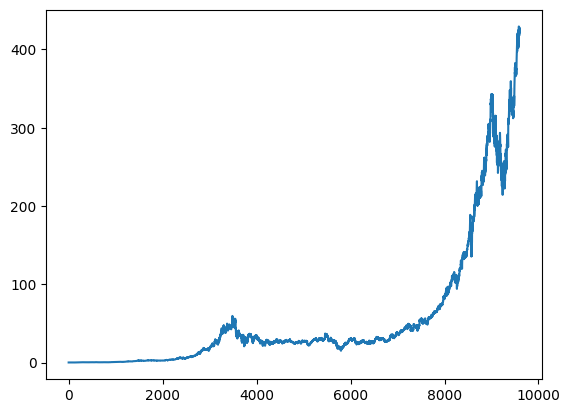

In [6]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [16]:
import numpy as np
import pandas as pd

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = pd.to_datetime(first_date_str)
    last_date = pd.to_datetime(last_date_str)

    # Convert 'Date' column to Timestamp
    dataframe['Date'] = pd.to_datetime(dataframe['Date'])

    target_date = first_date

    dates = []
    X, Y = [], []

    while target_date <= last_date:
        df_subset = dataframe[dataframe['Date'] <= target_date].tail(n+1)

        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        next_date = target_date + pd.Timedelta(days=1)  # Find the next available date

        target_date = next_date

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X = np.array(X)
    for i in range(0, n):
        ret_df[f'Target-{n-i}'] = X[:, i]

    ret_df['Target'] = Y

    return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, '2021-03-25', '2022-03-23', n=3)
windowed_df


<ipython-input-16-3b4cfb68df7d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Date'] = pd.to_datetime(dataframe['Date'])


,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-27,237.580002,235.460007,232.339996,236.479996
3,2021-03-28,237.580002,235.460007,232.339996,236.479996
4,2021-03-29,235.460007,232.339996,236.479996,235.240005
...,...,...,...,...,...
359,2022-03-19,287.149994,294.390015,295.220001,300.429993
360,2022-03-20,287.149994,294.390015,295.220001,300.429993
361,2022-03-21,294.390015,295.220001,300.429993,299.160004
362,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [17]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((364,), (364, 3, 1), (364,))

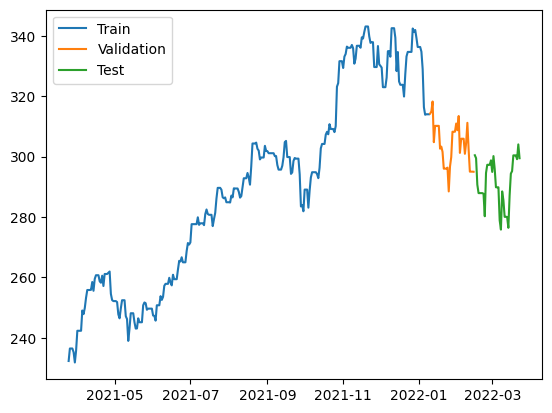

In [18]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
10/10 [==============================] - 4s 70ms/step - loss: 85115.8672 - mean_absolute_error: 289.9983 - val_loss: 92601.0312 - val_mean_absolute_error: 304.2233
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 84912.8516 - mean_absolute_error: 289.6483 - val_loss: 92493.4375 - val_mean_absolute_error: 304.0464
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 84844.4297 - mean_absolute_error: 289.5303 - val_loss: 92458.9766 - val_mean_absolute_error: 303.9897
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 84810.6250 - mean_absolute_error: 289.4721 - val_loss: 92423.5391 - val_mean_absolute_error: 303.9315
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 84777.1484 - mean_absolute_error: 289.4142 - val_loss: 92386.9844 - val_mean_absolute_error: 303.8713
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 84737.6641 - mean_absolute_error: 289.3460 - val_lo

10/10 [==============================] - 1s 3ms/step


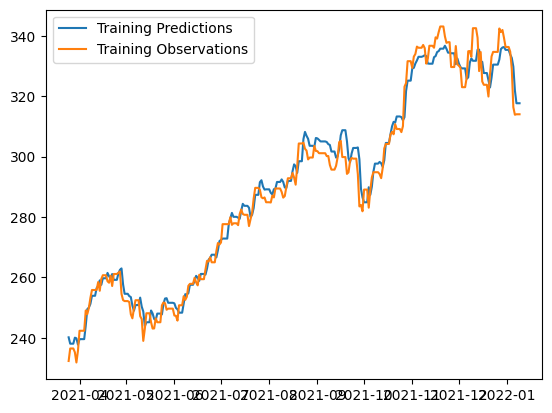

In [20]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 [==============================] - 0s 7ms/step


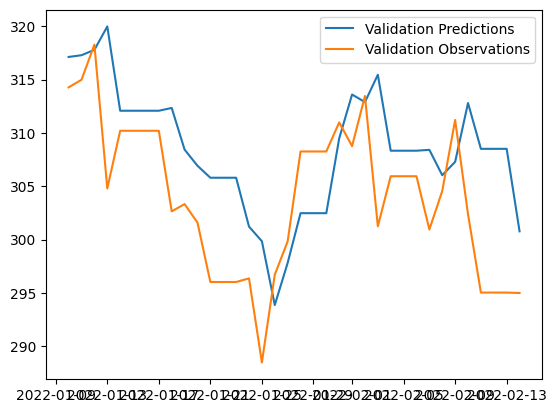

In [21]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 [==============================] - 0s 5ms/step


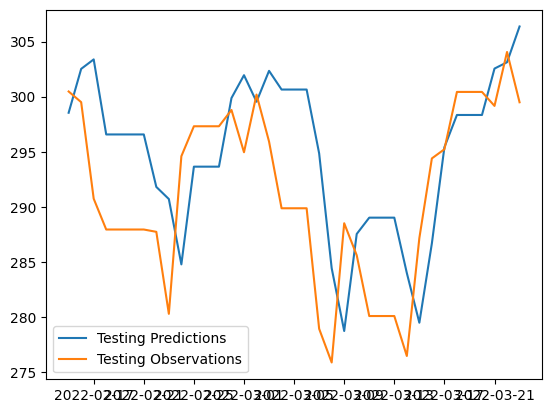

In [22]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

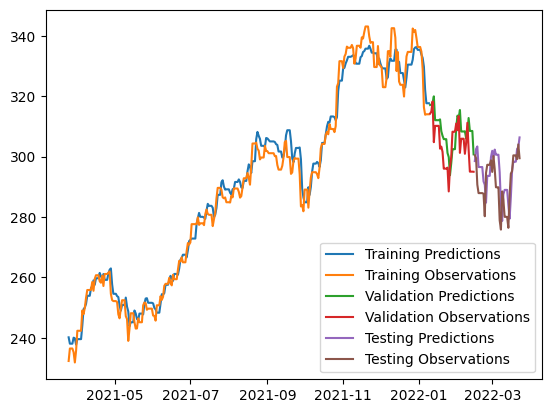

In [23]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [24]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 20ms/step


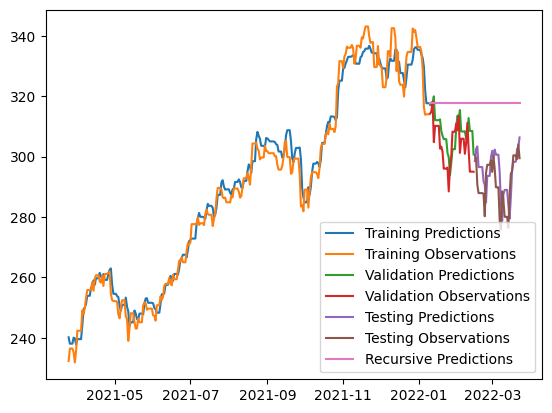

In [25]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])